<a href="https://colab.research.google.com/github/Seenuprime/Pneumonia_detector/blob/main/Pneumonia_Detector(Pytorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!kaggle datasets download pcbreviglieri/pneumonia-xray-images

Dataset URL: https://www.kaggle.com/datasets/pcbreviglieri/pneumonia-xray-images
License(s): Attribution 4.0 International (CC BY 4.0)
100% 1.14G/1.14G [00:10<00:00, 155MB/s]
100% 1.14G/1.14G [00:10<00:00, 120MB/s]


In [3]:
import zipfile
zipfile = zipfile.ZipFile('pneumonia-xray-images.zip')
zipfile.extractall()
zipfile.close()

### About Dataset


Content:

Adapted version of Paul Mooney's 'Chest X-Ray Images (Pneumonia)' dataset, where the amount of observations for training and validation purposes was redistributed to allow for a more balanced machine learning exercise.

Total number of observations (images): 5,856

Training observations: 4,192 (1,082 normal cases, 3,110 lung opacity cases)

Validation observations: 1,040 (267 normal cases, 773 lung opacity cases)

Testing observations: 624 (234 normal cases, 390 lung opacity cases)

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [53]:
import os

classes = sorted(os.listdir('train'))
print(classes)

['normal', 'opacity']


### Lung Opacity Meaning:

In pneumonia, opacity refers to the hazy gray areas that can show up in CT scans or X-rays of the lungs. These areas indicate increased density within the lungs, which could suggest fluid in air spaces, thickening of air space walls, thickening of lung tissue, inflammation, or pulmonary edema. Opacity can be a sign of pneumonia, and it may indicate that something is partially filling the air spaces inside the lungs. Ground-glass opacity (GGO) is a specific type of opacity that can be seen in pneumonia and other respiratory conditions. It is often associated with viral or bacterial infections and can be a common finding in patients with moderate to severe respiratory conditions, including those infected with COVID-19.

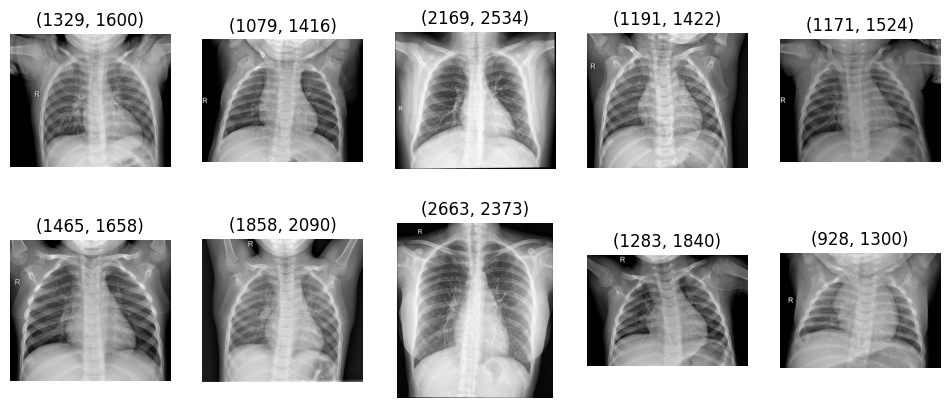

In [54]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random

train_normal = 'train/normal'
image_files = os.listdir(train_normal)
figure = plt.figure(figsize=(12, 5))
cols, rows = 5, 2

for i in range(1, cols*rows+1):
  rand_indx = random.randint(0, len(image_files)-1)
  image = cv.imread(os.path.join(train_normal, image_files[rand_indx]), 0)
  plt.subplot(rows, cols, i)
  plt.imshow(image, cmap='gray')
  plt.title(image.shape)
  plt.axis(False)

Our images has different shapes so we hava to make all image shapes as same

we will make all our image shapes to 224x224

In [64]:
transform = transforms.Compose([
    transforms.Resize((128, 128)), ## Reshaping the images
    transforms.Grayscale(),
    transforms.ToTensor(), ## Converting to tensor
    transforms.Normalize((0.5, ), (0.5, )) ## Mean of 0.5 and Std of 0.5
])

In [65]:
train_dataset = datasets.ImageFolder('./train', transform=transform)
val_dataset = datasets.ImageFolder('./val', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

torch.Size([128, 128])
torch.Size([128, 128])
torch.Size([128, 128])
torch.Size([128, 128])
torch.Size([128, 128])
torch.Size([128, 128])
torch.Size([128, 128])
torch.Size([128, 128])
torch.Size([128, 128])
torch.Size([128, 128])


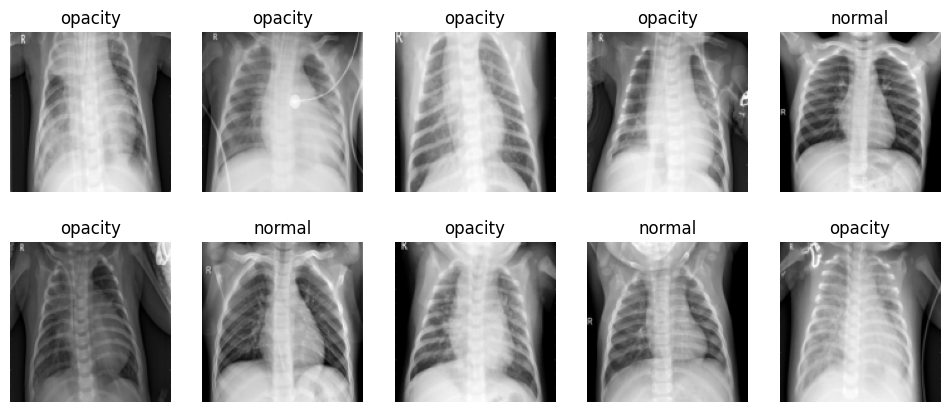

In [66]:
images, labels = next(iter(train_loader))

figure = plt.figure(figsize=(12, 5))
cols, rows = 5, 2

for i in range(1, cols*rows+1):
  rand_indx = random.randint(0, len(labels)-1)
  img = images[rand_indx].squeeze()
  print(img.shape)
  plt.subplot(rows, cols, i)
  plt.imshow(img, cmap='gray')
  plt.title(classes[labels[rand_indx].item()])
  plt.axis(False)

In [68]:
class Cnn(nn.Module):
  def __init__(self):
    super(Cnn, self).__init__()

    self.conv_layer = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1), ## 1x128x128 --> 16x128x128
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2), # 16x64x64
        nn.Conv2d(16, 32, 3, 1, 1), # 32x64x64
        nn.ReLU(),
        nn.MaxPool2d(2, 2), # 32x32x32
        nn.Conv2d(32, 16, 2, 1, 1), # 16x32x32
        nn.ReLU(),
        nn.MaxPool2d(2, 2) # 16x16x16
    )

    self.fc = nn.Sequential(
        nn.Flatten(), # 16*16*16
        nn.Linear(16*16*16, 1, 784),
        nn.ReLU(),
        nn.Linear(784, 1),
        nn.Sigmoid()
    )

    def forward(self, x):
      x = self.model(x)
      x = self.fc(x)
      return x

model = Cnn()

In [69]:
model

Cnn(
  (conv_layer): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4096, out_features=1, bias=True)
    (2): ReLU()
    (3): Linear(in_features=784, out_features=1, bias=True)
    (4): Sigmoid()
  )
)